# Analysis of registrations for the __Planning To Publish - Research Datasets__ workshop  

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# sns.set()
import re
%matplotlib notebook

### Read in CSV data

In [2]:
df = pd.read_csv('p2p_datasets_signups_deidentified.csv')
df.head()

,Booking made,Registration Type,Attendance,Faculty,Student or staff category,How would you describe your experience with research data publishing?
0,14/09/2023 19:19,Online,-,"Art, Design & Architecture",Postgraduate,I’m new to this - tell me everything!
1,24/09/2023 21:41,Online,-,"Art, Design & Architecture",Postgraduate,I’m new to this - tell me everything!
2,21/09/2023 18:40,Online,-,Business,Postgraduate,I’m new to this - tell me everything!
3,25/09/2023 12:23,Online,-,Library,Professional staff,I’m comfortable with the concepts but have yet...
4,22/09/2023 12:55,Online,-,Engineering,Academic staff,I’m new to this - tell me everything!


### Prepare the data for plotting

In [3]:
# Remove non-required columns
df = df.drop(['Registration Type','Attendance','How would you describe your experience with research data publishing?'], axis=1)
df.head()

,Booking made,Faculty,Student or staff category
0,14/09/2023 19:19,"Art, Design & Architecture",Postgraduate
1,24/09/2023 21:41,"Art, Design & Architecture",Postgraduate
2,21/09/2023 18:40,Business,Postgraduate
3,25/09/2023 12:23,Library,Professional staff
4,22/09/2023 12:55,Engineering,Academic staff


In [4]:
# Delete any row with zero values
df = df[df!=0].dropna()
df.head()

,Booking made,Faculty,Student or staff category
0,14/09/2023 19:19,"Art, Design & Architecture",Postgraduate
1,24/09/2023 21:41,"Art, Design & Architecture",Postgraduate
2,21/09/2023 18:40,Business,Postgraduate
3,25/09/2023 12:23,Library,Professional staff
4,22/09/2023 12:55,Engineering,Academic staff


In [5]:
# Convert 'Booking made' datetimes to dates
df['Booking made'] = pd.to_datetime(df['Booking made']).dt.date
df.head()

/tmp/ipykernel_8663/3172507383.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Booking made'] = pd.to_datetime(df['Booking made']).dt.date


,Booking made,Faculty,Student or staff category
0,2023-09-14,"Art, Design & Architecture",Postgraduate
1,2023-09-24,"Art, Design & Architecture",Postgraduate
2,2023-09-21,Business,Postgraduate
3,2023-09-25,Library,Professional staff
4,2023-09-22,Engineering,Academic staff


In [6]:
# Rename ADA faculty
df.loc[df['Faculty'] == 'Art, Design & Architecture', 'Faculty'] = 'ADA'
df.head()

,Booking made,Faculty,Student or staff category
0,2023-09-14,ADA,Postgraduate
1,2023-09-24,ADA,Postgraduate
2,2023-09-21,Business,Postgraduate
3,2023-09-25,Library,Professional staff
4,2023-09-22,Engineering,Academic staff


In [7]:
# Combine faculty and staff/student type into one column
df['Faculty Staff/Student'] = df['Faculty'] + ' ('+ df['Student or staff category'] + ')'
df.head()

,Booking made,Faculty,Student or staff category,Faculty Staff/Student
0,2023-09-14,ADA,Postgraduate,ADA (Postgraduate)
1,2023-09-24,ADA,Postgraduate,ADA (Postgraduate)
2,2023-09-21,Business,Postgraduate,Business (Postgraduate)
3,2023-09-25,Library,Professional staff,Library (Professional staff)
4,2023-09-22,Engineering,Academic staff,Engineering (Academic staff)


In [8]:
# Sort from oldest to most recent booking made
df.sort_values(by="Booking made", inplace=True)
df.head()

,Booking made,Faculty,Student or staff category,Faculty Staff/Student
10,2023-09-11,Engineering,Postgraduate,Engineering (Postgraduate)
0,2023-09-14,ADA,Postgraduate,ADA (Postgraduate)
11,2023-09-18,Engineering,Postgraduate,Engineering (Postgraduate)
2,2023-09-21,Business,Postgraduate,Business (Postgraduate)
39,2023-09-22,Medicine & Health,Postgraduate,Medicine & Health (Postgraduate)


In [9]:
# Drop redundant columns
df = df.drop(['Faculty', 'Student or staff category'], axis=1)
df.head()

,Booking made,Faculty Staff/Student
10,2023-09-11,Engineering (Postgraduate)
0,2023-09-14,ADA (Postgraduate)
11,2023-09-18,Engineering (Postgraduate)
2,2023-09-21,Business (Postgraduate)
39,2023-09-22,Medicine & Health (Postgraduate)


### Group the data

In [10]:
# Group by Booking made date
grouped_data = df.groupby(['Booking made','Faculty Staff/Student'])['Faculty Staff/Student'].count()
grouped_data.head(30)

Booking made  Faculty Staff/Student                 
2023-09-11    Engineering (Postgraduate)                1
2023-09-14    ADA (Postgraduate)                        1
2023-09-18    Engineering (Postgraduate)                1
2023-09-21    Business (Postgraduate)                   1
2023-09-22    Engineering (Academic staff)              5
              Engineering (Postgraduate)                8
              Engineering (Professional staff)          1
              Medicine & Health (Academic staff)        5
              Medicine & Health (Postgraduate)          8
              Medicine & Health (Professional staff)    2
2023-09-23    Medicine & Health (Postgraduate)          1
2023-09-24    ADA (Postgraduate)                        1
              Medicine & Health (Postgraduate)          2
2023-09-25    Engineering (Academic staff)              1
              Engineering (Postgraduate)                5
              Library (Professional staff)              1
              Medic

### Plot data

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['hatch.linewidth'] = 0.5

In [12]:
font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
color_dict = {
    'ADA (Postgraduate)':'yellowgreen', 
    'Business (Postgraduate)': 'peachpuff', 
    'Engineering (Postgraduate)': 'tan',
    'Engineering (Academic staff)': 'tan',
    'Engineering (Professional staff)': 'tan',
    'Medicine & Health (Academic staff)': 'thistle',
    'Medicine & Health (Postgraduate)': 'thistle',
    'Medicine & Health (Professional staff)': 'thistle',
    'Library (Professional staff)': 'lightcoral',
    'Science (Postgraduate)': 'paleturquoise'
}

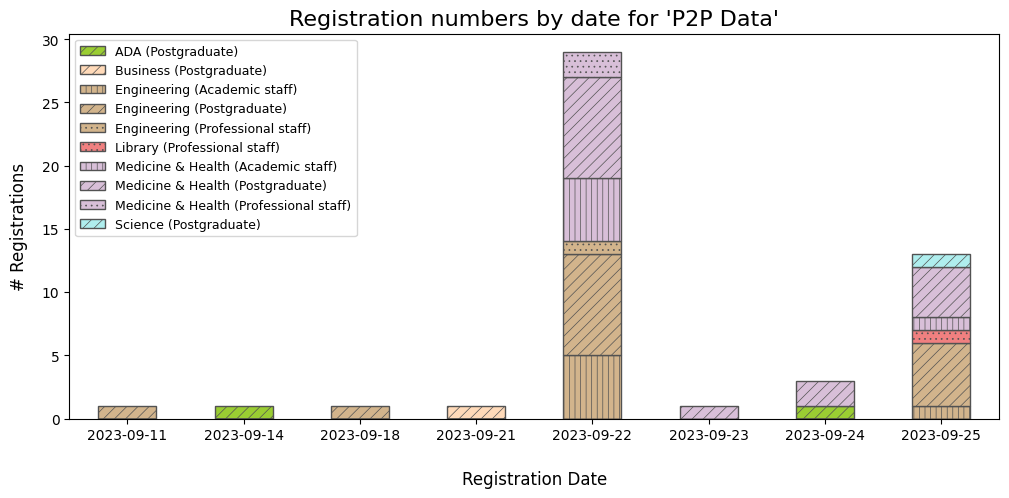

In [13]:
# Plot and style chart
ax = grouped_data.unstack().plot(kind='bar', stacked=True, color=color_dict)

plt.legend(fontsize="200")
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.title("Registration numbers by date for 'P2P Data'", fontsize=16)

ax.set_xlabel('Registration Date', fontsize=12, rotation=0, labelpad=20)
ax.set_ylabel('# Registrations', fontsize=12,rotation=90, labelpad=10)


for bars in ax.containers:
    for bar in bars:
        if 'Postgraduate' in bars.get_label():
            bar.set_hatch('///')
        if 'Professional' in bars.get_label():
            bar.set_hatch('...')     
        if 'Academic' in bars.get_label():
            bar.set_hatch('|||')
        bar.set_edgecolor('#525252')

ax.legend(fontsize=9, loc="upper left")
plt.savefig('p2p-data_registrations_by_date.png', bbox_inches='tight')

plt.show()